In [1]:
import pandas as pd
import numpy as np

summary6 = open("summary6.csv", "r")

rem_text = summary6.read()
text_split = rem_text.split('\n')
rem_data = np.array(text_split[0].split(','))

bad_list = ['P008']
for i in range(1, len(text_split)-1):
    line = text_split[i].split(',')
    if line[1] not in bad_list:
        rem_data = np.vstack((rem_data, line))
        
pd.set_option('display.max_columns', None)
df = pd.DataFrame(rem_data[1:], columns=rem_data[0])
df

,name,id,o_rem_num,x_rem_num,o_rem_duration,x_rem_duration,o_rem_avg,x_rem_avg,o_rem_frag,x_rem_frag,o_rem_density,x_rem_density,o_am_vas,x_am_vas,o_pm_vas,x_pm_vas,o_am_cortisol,x_am_cortisol,o_pm_cortisol,x_pm_cortisol,note,age,exp,o_ahi,o_ai,o_hi,x_ahi,x_ai,x_hi,o_start,x_start,o_rem_latency,x_rem_latency,o_rem_per,x_rem_per
0,陳碧蓮,P001,9,6,4620,2460,513,410,6.4372,6.1911,17.749,36.22,.,.,.,.,10.8,5.9,5.7,3.4,.,60,19,19.2,4.4,14.8,22.1,5.9,16.2,21:27:15,21:27:15,4950,12990,15.4,9.3
1,陳佳星,P002,7,8,4740,3990,677,499,0.6371,2.9749,20.612,12.857,5,5,3,4,6.4,9.3,4.1,7.9,x_fs=200訊號有干擾,35,0.6,2.2,0.2,2.1,3.6,0.3,3.3,22:30:58,22:29:10,8550,3720,18.4,14.2
2,袁賽芳,P003,6,5,3990,5700,655,1140,7.0125,6.8386,20.401,11.509,3,2,5,3,7.7,9.3,4.7,5.8,o_fs=200訊號有干擾,54,10,39.7,9.7,30,36.7,7,29.7,22:43:54,22:17:49,6420,6600,16.7,20.5
3,鄭雅菁,P004,9,8,4230,5190,470,649,5.2128,7.3565,32.648,32.486,3,2,4,2,8,5.7,6.3,5.1,x_fs=200,45,9,4.1,0,4.1,7.6,0,7.6,22:03:16,21:40:28,6330,8670,17.5,19.2
4,謝秀珍,P005,8,7,6780,6510,848,930,3.4794,3.596,12.537,18.095,.,.,.,.,8.6,5.9,4,4.2,.,54,6,3.8,0,3.8,3.9,0,3.9,22:15:43,21:06:21,3270,10320,27.2,22.9
5,黃淑惠,P006,7,8,4770,4860,681,608,7.0629,4.4959,7.4423,26.687,4,3,3,3,9.6,8.5,6.1,7.1,o_fs=200,54,13,24.7,4.1,20.5,25.2,0.6,24.6,23:00:14,22:33:19,4650,3150,20.3,22.3
6,陳淑美,P007,3,5,1920,1950,640,390,1.4323,3.5026,15.573,46.718,3,2,4,2,12.4,13.4,8.1,7.6,o_fs=200; eeg有干擾,48,6,0.9,0,0.9,1.7,0,1.7,22:45:03,20:44:25,15540,19440,7.4,7.1
7,郭秉羱,P009,6,7,3360,3900,560,557,0.9077,0.741,9.6131,11.692,3,2,4,7,10.1,11.4,7.4,7.2,.,19,0.4,2.5,0.8,1.7,1.8,0.6,1.2,22:45:29,22:34:36,8880,5820,12.6,14.8
8,張柏瑞,P010,7,7,2700,3930,386,561,9.5444,6.1959,32.148,19.211,.,.,.,.,11.3,7.1,5.3,4.6,o訊號怪怪的; x_fs=200,26,2.5,14,0.2,13.8,11.6,0.7,10.9,23:12:18,23:04:37,4500,4200,11.8,18
9,莊惠雅,P011,13,6,3210,1050,247,175,13.5,15.829,45.078,26.857,7,5,5,5,7.6,5.1,4.6,3.6,x_fs=200; x_eog高頻雜訊,43,20,29.2,0,29.2,31.8,0.7,31.1,22:49:00,22:57:05,4830,8400,14.8,4.8


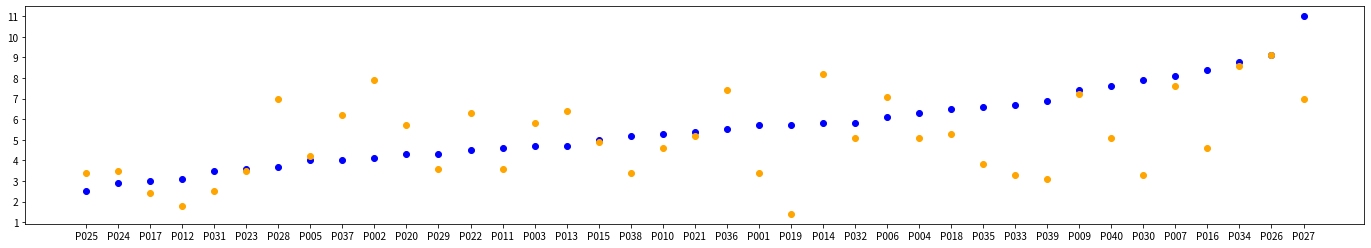

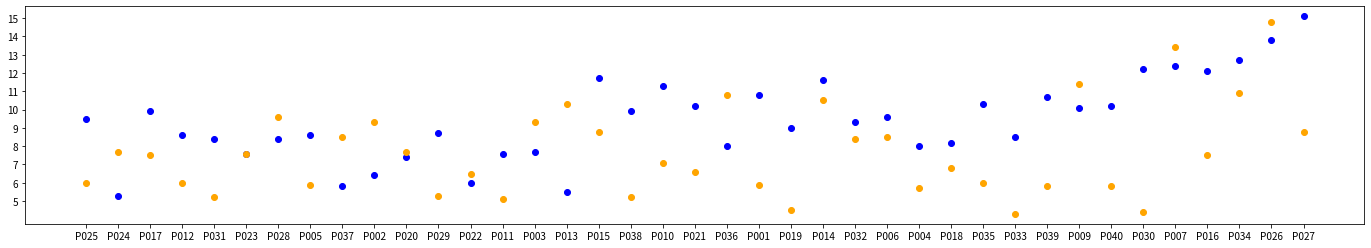

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_pm_cortisol', 'x_pm_cortisol', 'o_am_cortisol', 'x_am_cortisol']]
data = data.astype({'o_pm_cortisol': 'single', 'x_pm_cortisol': 'single', 'o_am_cortisol': 'single', 'x_am_cortisol': 'single'})
data = data.sort_values('o_pm_cortisol')

x = np.array(data['id'])
y1 = np.array(data['o_pm_cortisol'])
y2 = np.array(data['x_pm_cortisol'])
y3 = np.array(data['o_am_cortisol'])
y4 = np.array(data['x_am_cortisol'])

# p.m.
plt.figure(figsize=(24,4))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y1, c='blue')
plt.scatter(x, y2, c='orange')

plt.yticks(np.arange(1, 12, 1)) 

# plt.title("早晨cortisol: 暴露(藍)、非暴露(橘)")
plt.show()

# a.m.
plt.figure(figsize=(24,4))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y3, c='blue')
plt.scatter(x, y4, c='orange')

plt.yticks(np.arange(5, 16, 1))
# plt.title("傍晚cortisol: 暴露(藍)、非暴露(橘)")
plt.show()